In [1]:
from keras.datasets import mnist


In [2]:
(train_images,train_labels),(test_images,test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [3]:
mnist

<module 'keras.datasets.mnist' from '/home/piah/anaconda3/lib/python3.8/site-packages/keras/datasets/mnist.py'>

In [4]:
import numpy as np

print(type(train_images))
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

<class 'numpy.ndarray'>
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [5]:
print(train_images[0],"->", train_labels[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [6]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Label: 4')

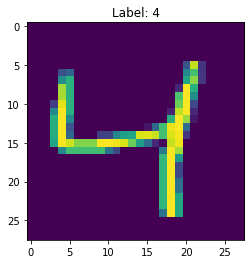

In [7]:
%matplotlib inline
index = 2
plt.imshow(train_images[index])
plt.title("Label: " + str(train_labels[index]))

In [8]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))
model.summary()

model.compile(
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [9]:
(train_images,train_labels),(test_images,test_labels) = mnist.load_data()

train_images = train_images.astype("float32") / 255.0
test_images = test_images.astype("float32") / 255.0

print(train_labels[0])

from keras.utils import to_categorical #one hot encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

print(train_labels[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [10]:
model.fit(
    train_images, train_labels,
    epochs=5,
    batch_size=128
)

Epoch 1/5
469/469 [==============================] - 3s 4ms/step - loss: 0.4308 - accuracy: 0.8743
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1107 - accuracy: 0.9678
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0700 - accuracy: 0.9793
Epoch 4/5
469/469 [==============================] - 199s 420ms/step - loss: 0.0502 - accuracy: 0.9848: 14:57 - loss: 0.0510 - accuracy - ETA: 16:15 - loss: 0.0499 - accuracy: 0.985 - ETA: 17:01 - loss: 0.0499 - accuracy: 0.985 - ETA: 17:26 - loss: 0.0499 - accuracy: 0.985 - ETA: 18:55 - loss: 0.0498 - accuracy: 0.985 - ETA: 28:36 - loss: 0.0498
Epoch 5/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0348 - accuracy: 0.9899


In [11]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0647 - accuracy: 0.9800


[0.06471902132034302, 0.9800000190734863]

[1.3997168e-09 6.5164270e-11 5.2368461e-07 5.1164570e-05 7.2837071e-13
 6.3212383e-08 5.2998106e-14 9.9994791e-01 1.1620012e-08 3.0395668e-07]


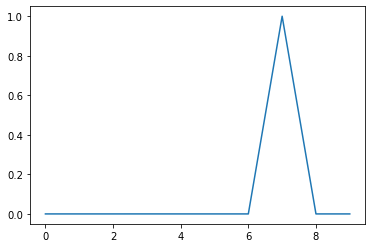

In [12]:
y = model.predict(test_images[0:1])[0]
plt.plot(y)
print(y)